In [14]:
# Comparing KNN model results (with and without standarization) utilizing the Diabetes dataset.


In [121]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets
from sklearn.neighbors import KNeighborsClassifier # Classifier implementing the k-nearest neighbors vote.
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance.
from sklearn.metrics import classification_report, confusion_matrix # Compute precision, recall, F-measure and support for each class

In [122]:
# Reading a comma-separated values (csv) file into DataFrame
df = pd.read_csv('diabetes.csv') 
# Checking data has been read in properly
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [123]:
# Checking number of rows and columns in dataset
df.shape

(768, 9)

In [124]:
# Applying KNN 

# Creating a dataframe with all training data except the target column
X = df.drop(columns=['Outcome'])
# Checking that the target variable has been removed
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [125]:
# Separating target values
y = df['Outcome'].values
# Viewing target values
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [126]:
# Spliting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [127]:
# KNN without standarization (fixed n neighbors)

knn = KNeighborsClassifier(n_neighbors = 3)
# Fiting the classifier to the data
knn.fit(X_train,y_train)
# Showing first 5 model predictions on the test data
pred = knn.predict(X_test)
# Checking accuracy of our model on the test data
knn.score(X_test, y_test)

0.7402597402597403

In [128]:
# Analizing the confuction matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[81 18]
 [22 33]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.65      0.60      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [129]:
# KNN without standarization - selecting the best model
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [130]:
np.min(error_rate)

0.21428571428571427

Text(0, 0.5, 'Error K')

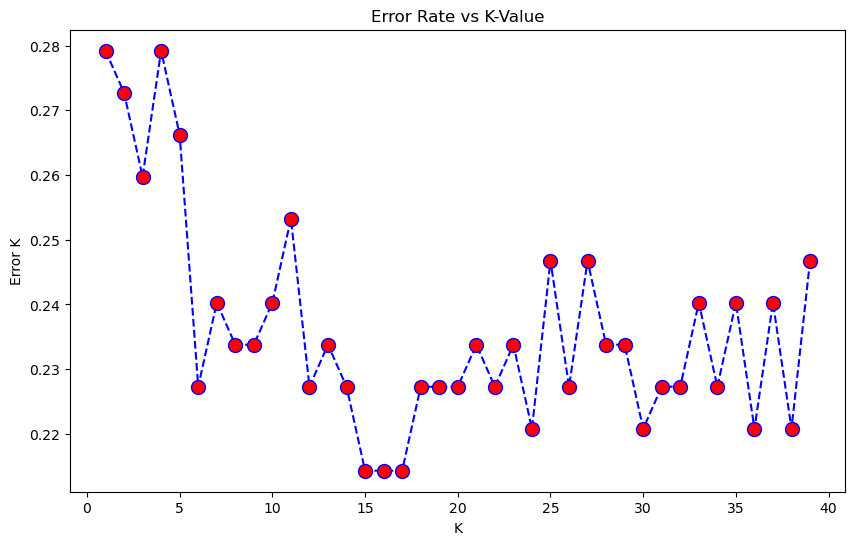

In [131]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', 
         linestyle = 'dashed', marker = 'o', 
         markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs K-Value")
plt.xlabel("K")
plt.ylabel("Error K")

In [133]:
# Rebulding and testing the model with K = 15
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[89 10]
 [23 32]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [134]:
# KNN with standarization 

scaler =StandardScaler()
scaler.fit(df.drop("Outcome", axis = 1 ))

StandardScaler()

In [135]:
scaled_features = scaler.transform(df.drop("Outcome", axis = 1))
scaled_features

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [136]:
#recreating df with standarized variable
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1]) #except the last column
df_feat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [137]:
X2 = df_feat
y2 = df["Outcome"]

# Spliting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=1)


In [138]:
error_rate2 = []

for i in range(1,40):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train, y_train)
    pred_i = knn2.predict(X_test)
    error_rate2.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error K')

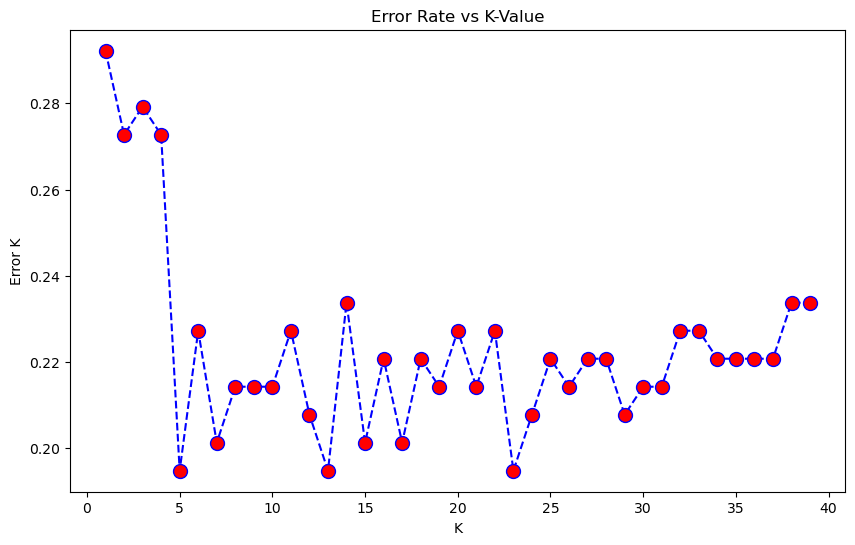

In [139]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate2, color = 'blue', 
         linestyle = 'dashed', marker = 'o', 
         markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs K-Value")
plt.xlabel("K")
plt.ylabel("Error K")

In [140]:
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train,y_train)
pred2 = knn2.predict(X_test)
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))

[[90  9]
 [21 34]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        99
           1       0.79      0.62      0.69        55

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.78       154
weighted avg       0.80      0.81      0.80       154



In [111]:
# Conclution:
# Without standarization K=15 is the best cluster-size selection with an accuracy of .74.
# With standarization K=5 is the best cluster-size selection with an accurancy of .81.
# Using standarization the model need a lower number of neighbours and get a best performance at the same time.